# Lecture 1: Visualization

In this notebook we will learn about how to visualize data with different methods.

In [4]:
# import some of our best friends
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # fancy plots
import pandas as pd # fancy plots need to come from pd data structure

## Group Data

Compare 2 groups of independent data. This is useful in behavioral analysis (compare behavioral measurement, model performance...)

Let's create some artificial dataset first. Simulate 2 random [Gaussian distributions](https://www.geogebra.org/m/fqZMa34Q).

In [5]:
# simulate 2 groups with different mean and standard deviation
nsamples = 50

y1 = np.random.randn(nsamples) * 10 + 50
y2 = np.random.randn(nsamples) * 7.5 + 40

In [8]:
# calculate basic properties to plot
M = [np.mean(y) for y in [y1,y2]] # mean
V = [np.std(y) for y in [y1,y2]]  # variance

Bar plots!

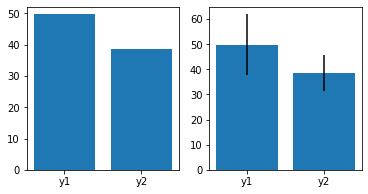

In [11]:
# create 2 plots side by side
fig,ax = plt.subplots(1,2, figsize=(6,3))

# basic bar plot
ax[0].bar([1,2],M);
ax[0].set(xticks=[1,2],xticklabels=['y1','y2']);

# add error bars
ax[1].bar([1,2],M,yerr = V);
ax[1].set(xticks=[1,2],xticklabels=['y1','y2']);

Fancy bar plots!

In [15]:
# create a panda DataFrame - like a spreadsheet
df = pd.DataFrame(np.vstack([y1,y2]).T,columns = ['y1','y2'])

In [16]:
# view the spreadsheet
df

,y1,y2
0,38.984611,33.787346
1,58.356609,47.478324
2,37.440946,33.277542
3,36.479647,25.299542
4,36.066758,38.844400
5,37.691125,42.706480
6,64.284315,39.925361
7,53.755293,37.709896
8,64.363364,28.688868
9,44.116287,26.975205


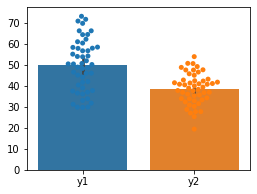

In [21]:
# plotting is quicker
fig,ax = plt.subplots(figsize=(4,3))
sns.barplot(data=df); 
# we can see there's a shorter error bar here, for that sns plots standard error instead of standard deviation (std / (n_sample-1))

# and now we add visualization of individual points
sns.swarmplot(data=df);

In [ ]:
# Homework: try doing this in matlibplot ax.scatter

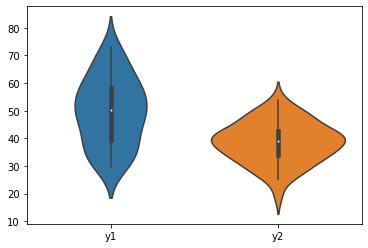

In [22]:
# violin plot
sns.violinplot(data=df);

AttributeError: 'Figure' object has no attribute 'shape'

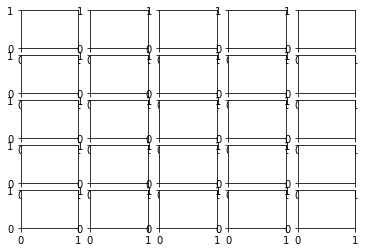

In [37]:
fig,ax = plt.subplots(5,5)
ax.shape

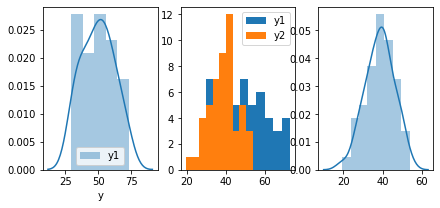

In [35]:
# histogram
fig,ax = plt.subplots(1,3,figsize=(7,3))

# seaborn histogram
h1 = sns.distplot(a=y1,ax=ax[0]);
h2 = sns.distplot(a=y2,ax=ax[2]);
ax[0].set(xlabel='y')
ax[0].legend(['y1','y2']);

# matplotlib histogram
ax[1].hist(y1);
ax[1].hist(y2);
ax[1].legend(['y1','y2']);

Last but not the least, statistical test:

In [38]:
from scipy.stats import ttest_ind
ttest_ind(y1,y2)

Ttest_indResult(statistic=5.513517886868815, pvalue=2.8550272957991323e-07)

## Paired group test

In [39]:
# simulate 2 groups with different mean and standard deviation
nsamples = 50

y1 = np.random.randn(nsamples) * 5 + 50
y2 = 0.8*y1 + 20 + np.random.rand(nsamples)*1 # each y2 sample is generated based on corresponding y2 sample

In [41]:
np.vstack([y1,y2]).shape

(2, 50)

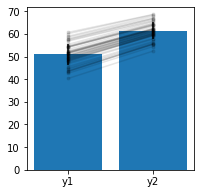

In [42]:
fig,ax = plt.subplots(figsize=(3,3))

# don't forget to recalculate value for plot
M = [np.mean(y1),np.mean(y2)]
V = [np.std(y1),np.std(y2)]

# bars with error bars
ax.bar([1,2],M,yerr=V);
ax.set(xticks=[1,2],xticklabels=['y1','y2']);

# now data is paired, let's connect them
ax.plot([1,2],np.vstack([y1,y2]),'.-',color=[0,0,0,0.1]);

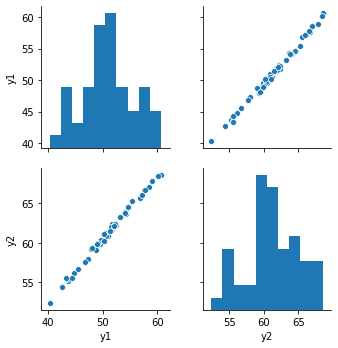

In [43]:
# to do this in seaborn
df = pd.DataFrame(np.vstack((y1,y2)).T,columns = ['y1','y2']) # create a new table
sns.pairplot(df);

## Time series data

General electrophysiological data (LFP, EEG), calcium signal.

In [ ]:
# simplest example: sine wave with noise

# create sample data
Fs = 1000 # sampling frequency
t = np.arange(0,0.3, 1/Fs)  # create time axis

In [ ]:
# start with 1 sine wave
y = 0.7 * np.sin(2*np.pi*50*t)
# or 2
y = 0.7 * ?

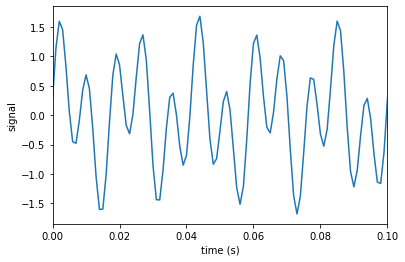

In [ ]:
fig,ax = plt.subplots()
ax.plot(t,y)
ax.set(xlabel='time (s)', ylabel='signal',xlim=[0,0.1]);

Frequency analysis

In [ ]:
# compute fast fourier transformation
sp = np.fft.fft(y)
freq = np.fft.fftfreq(t.shape[-1],1/Fs)

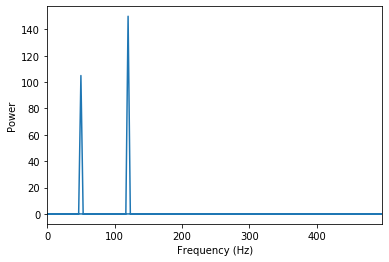

In [ ]:
# plot in fourier domain
fig,ax = plt.subplots()
ax.plot(freq,?);
ax.set(xlim=[0,max(freq)], xlabel='Frequency (Hz)', ylabel='Power');

Check out [MNE](https://mne.tools/stable/index.html#) for more details (or bring your data on Friday).

## Spiking data

In [4]:
# load sample datas
spiketime = np.load('Data/spiketime.npy')
eventtime = np.load('Data/eventtime.npy')

In [6]:
print('Spike time contains a vector with n elements, each corresponding to the time stamp of one spike.')
print('Event time corresponds to time stamps of event of interest.')
print(f'{?} spikes in total')

print(f'Check time stamps of first 5 spike: {?}')


Spike time contains a vector with n elements, each corresponding to the time stamp of one spike.
Event time corresponds to time stamps of event of interest.
22235 spikes in total
Check time stamps of first 5 spike: [[0.05069955]
 [0.08463259]
 [0.1211656 ]
 [0.14586538]
 [0.16779852]]


Raster plot:

In [ ]:
# collect spikes within certain time point (e.g. t=1 ~ t=2)
spiketime[?]

array([1.03505756, 1.09122373, 1.63958557, 1.8147507 ])

In [ ]:
# select time window of interest:
toi = np.array([-0.1,1])

# select spikes within time of interest of the first trial
spiketime[]

In [ ]:
# collect spikes within time window
tspk = [? for t in eventtime]

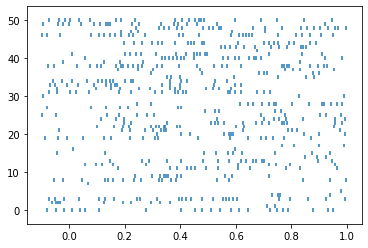

In [ ]:
plt.eventplot(tspk);

In [ ]:
# Homework: make this into a function
# so you can run plot_raster(spiketime, eventtime)